# <center>Предсказание пола на основе голоса
* meanfreq — средняя частота голоса спикера (в кГц);
* sd — стандартное отклонение частоты (в кГц);
* median — медианная частота (в кГц);
* Q25 — первый квартиль частоты (25-я квантиль) (в кГц);
* Q75 — третий квартиль частоты (75-я квантиль) (в кГц);
* IQR — межквартильный размах (Q75-Q25) (в кГц);
* skew — асимметрия распределения частот;
* kurt — эксцесс распределения частот;
* sp.ent — спектральная энтропия;
* sfm — спектральная равномерность;
* ode — модальная частота (наиболее популярная частота голоса);
* centroid — частотный центроид;
* peakf — пиковая частота (частота с наибольшей энергией);
* meanfun — среднее значение основной частоты, измеренной по акустическому сигналу;
* minfun — минимальное значение основной частоты, измеренной по акустическому сигналу;
* maxfun — максимальное значение основной частоты, измеренной по акустическому сигналу;
* meandom — среднее значение доминирующей частоты, измеренной по акустическому сигналу;
* mindom — минимальное значение доминирующей частоты, измеренной по акустическому сигналу;
* maxdom — максимальное значение доминирующей частоты, измеренной по акустическому сигналу;
* dfrange — диапазон доминирующей частоты, измеренный по акустическому сигналу;
* modindx — индекс модуляции;
* label — целевой признак — метка класса: male (голос принадлежит мужчине) или female (голос принадлежит женщине).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [2]:
voice_data = pd.read_csv('data/voice_gender.zip')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Посмотрим на типизацию признаков:

In [3]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Итак, все признаки, за исключением целевого, кодируются числовым форматом. Типизация целевой переменной не имеет значения для моделей машинного обучения в библиотеке `sklearn`, поэтому кодирование категориальных признаков нам не потребуется.

Заодно проверим данные на наличие пропусков:



In [4]:
voice_data.isnull().sum().sum()

0

Общее количество пропусков в датасете равно 0. Значит, обработка пропущенных значений нам не потребуется.



In [5]:
# Формируем обучающую и тестовую выборки
X, y = voice_data.drop(columns='label'), voice_data['label']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


**Задание 7.1**  
Начнём с решающего пня.

Создайте модель дерева решений максимальной глубины 1. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.

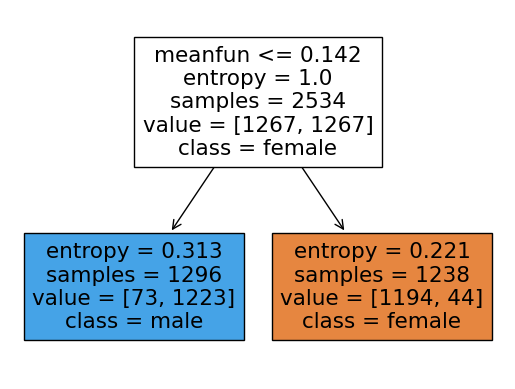

In [6]:
dt_model = tree.DecisionTreeClassifier(max_depth=1, criterion='entropy').fit(X_train, y_train)
tree.plot_tree(
    decision_tree=dt_model,
    filled=True,
    class_names=dt_model.classes_.tolist(),
    impurity=True,
    feature_names=X.columns.tolist(),
);

In [7]:
y_pred = dt_model.predict(X_test)
accuracy_test = metrics.accuracy_score(y_test, y_pred).round(3)
print(f'Accuracy: {accuracy_test}')

Accuracy: 0.956


**Задание 7.2**  
Увеличим глубину дерева.

Создайте дерево решений с максимальной глубиной 2. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.

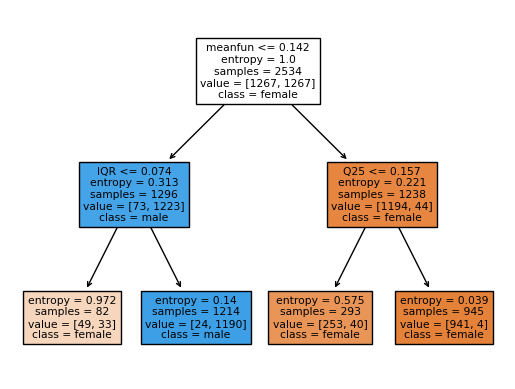

In [8]:
dt_model = tree.DecisionTreeClassifier(max_depth=2, criterion='entropy').fit(X_train, y_train)
tree.plot_tree(
    decision_tree=dt_model,
    filled=True,
    class_names=dt_model.classes_.tolist(),
    impurity=True,
    feature_names=X.columns.tolist(),
);

In [9]:
y_pred = dt_model.predict(X_test)
accuracy_test = metrics.accuracy_score(y_test, y_pred).round(3)
print(f'Accuracy: {accuracy_test}')

Accuracy: 0.962


**Задание 7.3**  
Давайте дадим дереву решений полную свободу.

Создайте дерево решений, не ограничивая его максимальную глубину. В качестве критерия информативности используйте энтропию Шеннона.

В качестве значения параметра `random_state` возьмите 0.

Обучите модель на тренировочной выборке.

In [10]:
dt_model = tree.DecisionTreeClassifier(random_state=0, criterion='entropy').fit(X_train, y_train)
print(
    'Глубина:', dt_model.get_depth(),
    '\nКоличество листьев:', dt_model.get_n_leaves()
)

Глубина: 12 
Количество листьев: 54


In [11]:
accuracy_train = metrics.accuracy_score(y_train, dt_model.predict(X_train)).round(3)
accuracy_test = metrics.accuracy_score(y_test, dt_model.predict(X_test)).round(3)
print(
    f'Train accuracy: {accuracy_train}',
    f'\nTest accuracy: {accuracy_test}'
)

Train accuracy: 1.0 
Test accuracy: 0.973


**Задание 7.4**  
Давайте попробуем найти оптимальные внешние параметры модели дерева решений для поставленной задачи. Воспользуемся классическим методом подбора гиперпараметров — перебором на сетке с кросс-валидацией (`Grid SearchCV`).

Задана следующая сетка параметров:

In [12]:
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

В качестве кросс-валидатора будем использовать k-fold-валидатор со стратификацией (`StratifiedKFold`):

In [13]:
cv = model_selection.StratifiedKFold(n_splits=5)

best_dt = model_selection.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=0),
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
).fit(X_train, y_train)
best_dt.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}

In [14]:
accuracy_train = metrics.accuracy_score(y_train, best_dt.predict(X_train)).round(3)
accuracy_test = metrics.accuracy_score(y_test, best_dt.predict(X_test)).round(3)
print(
    f'Train accuracy: {accuracy_train}',
    f'\nTest accuracy: {accuracy_test}'
)

Train accuracy: 0.996 
Test accuracy: 0.97


**Задание 7.5**  
Для оптимального дерева решений, построенного в задании 7.4, найдите важность каждого из факторов. Визуализируйте её в виде столбчатой диаграммы.

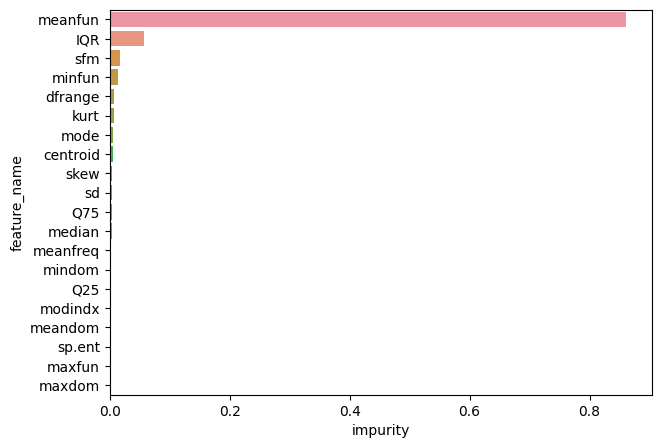

In [15]:
importances = pd.DataFrame({
    'feature_name': best_dt.best_estimator_.feature_names_in_,
    'impurity': best_dt.best_estimator_.feature_importances_
}).sort_values(by=['impurity'], ascending=False)

fig = plt.figure(figsize=(7, 5))
sns.barplot(x=importances['impurity'], y=importances['feature_name']);